In [1]:
cd("C:\\Users\\matsuno\\Desktop\\data_analysis\\HMMBase.jl\\src")
include(".//HMMBase.jl")
using .HMMBase

using Distributions
using Random
using PyPlot

In [17]:
a = [0.2, 0.8]
A = [0.3 0.7; 0.7 0.3]
B = [Normal(1, 1.5), Normal(10, 3)]
hmm = HMM(a, A, B)

HMM{Univariate,Float64}([0.2, 0.8], [0.3 0.7; 0.7 0.3], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=1.0, σ=1.5), Normal{Float64}(μ=10.0, σ=3.0)])

rand(hmm::AbstractHMM, T::Integer, N::Integer)

In [20]:
Random.seed!(1234)
z, y = rand(hmm, 500, 2, seq = true)
size(z)

(500, 2)

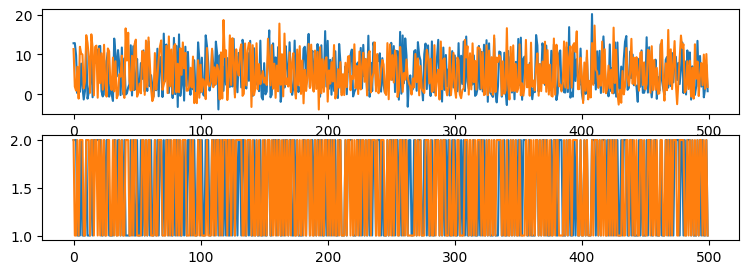

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005E871E10>
 PyObject <matplotlib.lines.Line2D object at 0x000000005E87E3C8>

In [21]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-")

In [22]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2, 2), (500, 2, 2), (500, 2, 2))

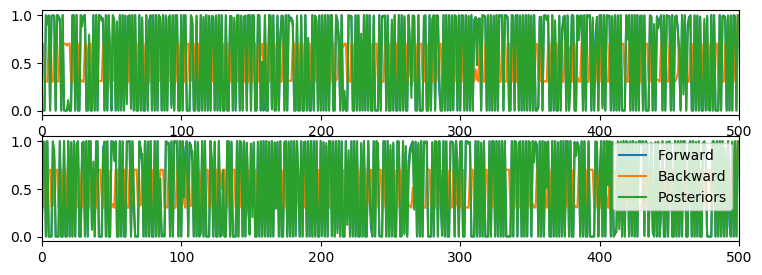

PyObject <matplotlib.legend.Legend object at 0x000000005FB477B8>

In [23]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

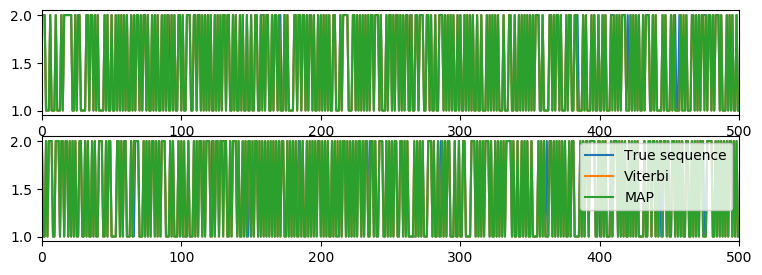

PyObject <matplotlib.legend.Legend object at 0x000000005FB90710>

In [24]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [26]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 36 iterations, logtot = -2720.052364124436


(HMM{Univariate,Float64}([2.252327470511715e-201, 1.0], [0.2997933924328158 0.7002066075671842; 0.7232111792464352 0.27678882075356487], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=1.0551463818300013, σ=1.575936142322521), Normal{Float64}(μ=10.288176784314865, σ=2.8599593363035964)]), Main.HMMBase.EMHistory(true, 36, [-3057.485126367407, -3057.432518315752, -3057.3378291534236, -3057.16684869042, -3056.8578806832343, -3056.298682613801, -3055.2829871851336, -3053.4249854793825, -3049.9833482572776, -3043.4905044270445  …  -2720.120148247567, -2720.096664859085, -2720.081187778507, -2720.0709438627173, -2720.0641436218007, -2720.059620273686, -2720.056607325588, -2720.0545985759477, -2720.053258495533, -2720.052364124436]))

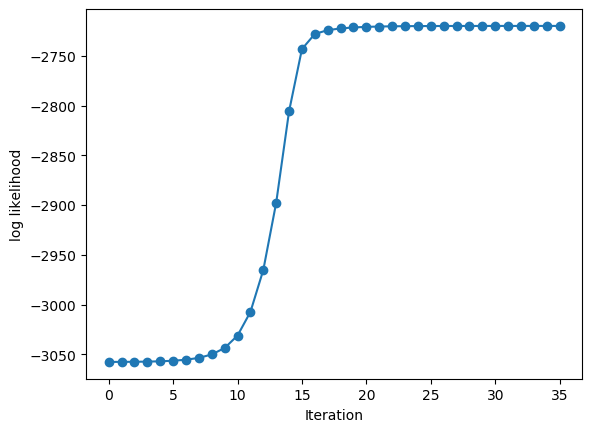

PyObject Text(24.0, 0.5, 'log likelihood')

In [28]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

rand(hmm::AbstractHMM, d::Distribution{Univariate,Discrete}, N::Integer))

In [32]:
Random.seed!(1234)
z, y = rand(hmm, Poisson(500), 2, seq = true)

(Union{Nothing, Int64}[2 2; 2 1; … ; 1 nothing; 2 nothing], Union{Nothing, Float64}[12.760329390467346 13.418339775892901; 11.8120011051622 4.0656868952494385; … ; 1.1484519315615218 nothing; 9.225537639680617 nothing])

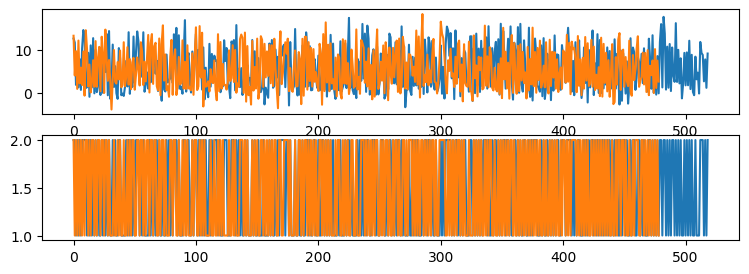

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005FC91CC0>
 PyObject <matplotlib.lines.Line2D object at 0x000000005FD30080>

In [33]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-")

In [34]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((519, 2, 2), (519, 2, 2), (519, 2, 2))

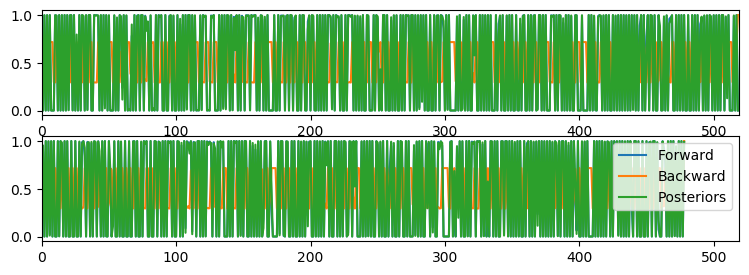

PyObject <matplotlib.legend.Legend object at 0x0000000061F8EEF0>

In [35]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

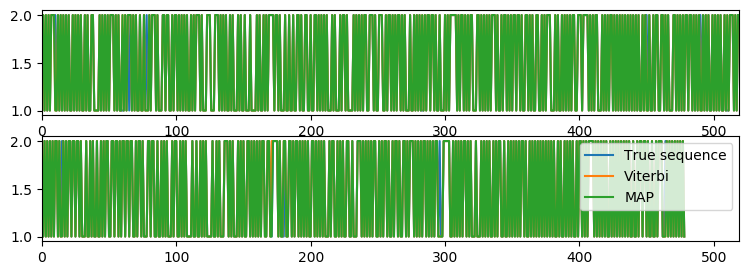

PyObject <matplotlib.legend.Legend object at 0x0000000062249748>

In [36]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [37]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 21 iterations, logtot = -2707.1461532646154


(HMM{Univariate,Float64}([0.0, 1.0], [0.25129737062655455 0.7487026293734453; 0.7561772373578748 0.24382276264212516], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=1.0446228739143777, σ=1.5718805585904378), Normal{Float64}(μ=10.24131864537396, σ=2.9097519238656484)]), Main.HMMBase.EMHistory(true, 21, [-3052.027258702094, -3050.6593459009346, -3047.9787169803594, -3042.628444979139, -3031.7795242088496, -3009.771313899237, -2967.4760131399935, -2897.130128099992, -2805.2080126869578, -2731.1647455357406  …  -2708.582269951993, -2707.645923553104, -2707.3256180102308, -2707.2142814746608, -2707.173938511702, -2707.1582111795956, -2707.1515228362896, -2707.148439516262, -2707.146926967416, -2707.1461532646154]))

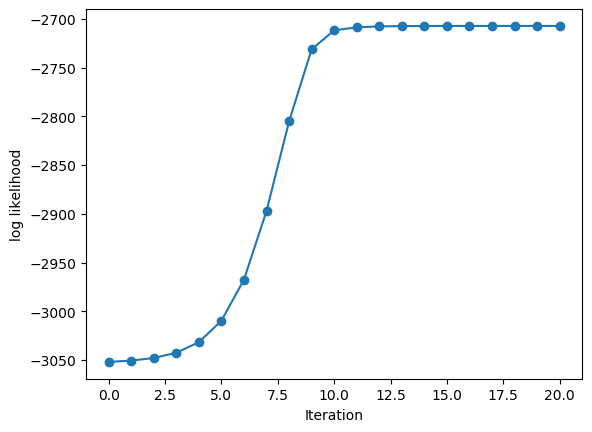

PyObject Text(24.0, 0.5, 'log likelihood')

In [38]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

In [39]:
hmm.B

2-element Array{Distribution{Univariate,S} where S<:ValueSupport,1}:
 Normal{Float64}(μ=1.0446228739143777, σ=1.5718805585904378)
 Normal{Float64}(μ=10.24131864537396, σ=2.9097519238656484)

In [70]:
import Base:OneTo
observations = copy(y)
estimator = fit_mle
responsibility2 = 0.0
_, K, N = size(γ)
# TODO: change "total_γ" to more suitable name
total_γ = Vector{Float64}(undef, K)
for n in OneTo(N)
    T = length(filter(!isnothing, γ[:, 1, n]))
    for t in OneTo(T)
        for i in OneTo(K)
            total_γ[i] +=  γ[t, i, n]
        end
    end
end
# for i in OneTo(K)
#     if sum(filter(!isnothing, γ[:, i, :])) > 0
#         responsibility2 = vcat(filter(!isnothing, γ[:, i, :]) .* total_γ[i] ./ total_γ[i]...)
#         B[i] = estimator(typeof(B[i]), vcat(filter(!isnothing, observations)...), responsibility2)
#     end
# end
for i in OneTo(K)
    if sum(HMMBase.getnotnothing(γ[:, i, :])) > 0
        responsibility2 = vcat(HMMBase.getnotnothing(γ[:, i, :]) .* total_γ[i] ./ total_γ[i]...)
        B[i] = estimator(typeof(B[i]), vcat(HMMBase.getnotnothing(observations)...), responsibility)
    end
end